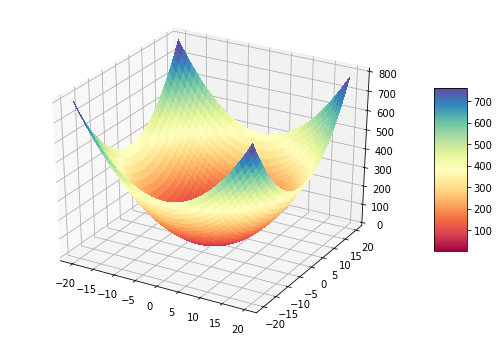

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


def plot_3d():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-20, 20, 0.25)
    Y = np.arange(-20, 20, 0.25)
    X, Y = np.meshgrid(X, Y)
    
    Z = X*X + Y*Y

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,
                                   linewidth=0, antialiased = False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

if __name__=="__main__":
    plot_3d()

In [51]:
# Chương trình cài đặt với mục đích dễ hiểu
# Nhiều chỗ có thể cải tiến về mặt computation và memory

import random

n = 6
m = 200
n_generations = 300

losses = []

# encoding
def generate_random_value(bound = 100):
    return (random.random()*2 - 1)*bound

# compute cost
def compute_cost(individual): # cost
    return sum(val*val for val in individual)

def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
               
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1) 
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 < index1: # get smaller one (cost)
        individual_s = sorted_old_population[index2]
    
    return individual_s 


##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_cost)
        
    # for debug
    losses.append(compute_cost(sorted_population[0]))
    print("Cost:", compute_cost(sorted_population[0]))
    
    # create new_population 
    new_population = sorted_population[:elitism] 
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        # copy 
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population

Cost: 4755.111692883642
Cost: 3242.7878280908026
Cost: 2760.55958148785
Cost: 681.5489248753321
Cost: 681.5489248753321
Cost: 681.5489248753321
Cost: 681.5489248753321
Cost: 624.682892674967
Cost: 198.8364533724639
Cost: 198.8364533724639
Cost: 198.8364533724639
Cost: 92.71357133424378
Cost: 92.71357133424378
Cost: 92.71357133424378
Cost: 92.71357133424378
Cost: 92.71357133424378
Cost: 69.44887515527978
Cost: 69.44887515527978
Cost: 69.44887515527978
Cost: 69.44887515527978
Cost: 38.51935447241384
Cost: 38.39378350419971
Cost: 38.39378350419971
Cost: 38.347184674628565
Cost: 38.347184674628565
Cost: 38.347184674628565
Cost: 29.610241799979217
Cost: 29.610241799979217
Cost: 19.44597559010383
Cost: 19.44597559010383
Cost: 19.44597559010383
Cost: 19.22598770457557
Cost: 19.22598770457557
Cost: 19.22598770457557
Cost: 10.662433885883338
Cost: 10.490264088098069
Cost: 10.490264088098069
Cost: 10.490264088098069
Cost: 9.099430798587179
Cost: 9.099430798587179
Cost: 9.099430798587179
Cost: 8.

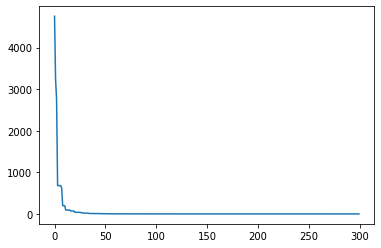

In [52]:
import matplotlib.pyplot as plt

x_axis = list(range(len(losses)))
plt.plot(x_axis, losses)
plt.show()